# YBIGTA ML PROJECT / 염정운

## Setting

In [3]:
import numpy as np
import pandas as pd

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(rc={'figure.figsize':(11.7,10)})

## Identity data

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature 
<br>
(UA/browser/os/version, etc) associated with transactions. 
<br>
They're collected by Vesta’s fraud protection system and digital security partners.
<br>
The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
<br>
DeviceType
<br>
DeviceInfo
<br>
id12 - id38

In [0]:
#train_identity가 불편해서 나는 i_merged라는 isFraud를 merge하고 column 순서를 조금 바꾼 새로운 Dataframe을 만들었어! 이건 그 코드!

#i_merged = train_i.merge(train_t[['TransactionID', 'isFraud']], how = 'left', on = 'TransactionID')
#order_list =['TransactionID', 'isFraud', 'DeviceInfo', 'DeviceType', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
#             'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 
#             'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 
#             'id_35', 'id_36', 'id_37', 'id_38']
             

#i_merged = i_merged[order_list]
#i_merged.head()
#i_merged.to_csv('identity_merged.csv', index = False)

In [5]:
save = pd.read_csv('identity_merged.csv')

In [19]:
i_merged = pd.read_csv('identity_merged.csv')

###  <font color='blue'>NaN 비율</font> 


In [0]:
nullrate = (((i_merged.isnull().sum() / len(i_merged)))*100).sort_values(ascending = False)

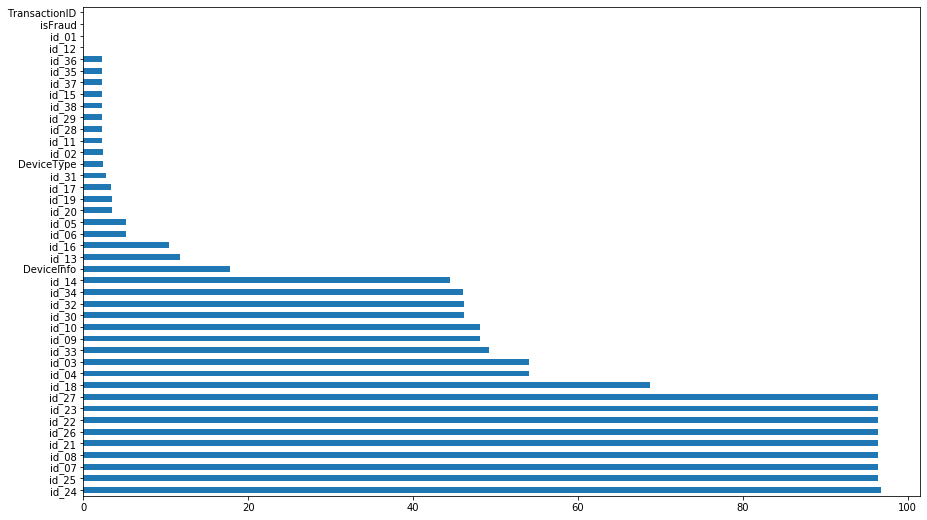

In [0]:
nullrate.plot(kind='barh', figsize=(15, 9))

In [0]:
i_merged.head()

,TransactionID,isFraud,DeviceInfo,DeviceType,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,2987004,0,SAMSUNG SM-G892A Build/NRD90M,mobile,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,2987008,0,iOS Device,mobile,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,2987010,0,Windows,desktop,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,2987011,0,NaN,desktop,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,2987016,0,MacOS,desktop,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T


###  <font color='blue'>DeviceType</font> 

nan(3.1%) < desktop(6.5%) < mobile(10.1%) 순으로 isFraud 증가 추이
<br>
*전체 datatset에서 isFraud = 1의 비율 7.8%

In [0]:
#DeviceType
i_merged.groupby(['DeviceType', 'isFraud']).size().unstack()

isFraud,0,1
DeviceType,,
desktop,79611,5554
mobile,49988,5657


In [0]:
i_merged[i_merged.DeviceType.isnull()].groupby('isFraud').size()

isFraud
0    3316
1     107
dtype: int64

###  <font color='blue'>Null count in row</font> 

결측치 정도와 isFraud의 유의미한 상관관계 찾지 못함

In [0]:
i_merged = i_merged.assign(NaN_count = i_merged.isnull().sum(axis = 1))

In [0]:
print(i_merged.assign(NaN_count = i_merged.isnull().sum(axis = 1)).groupby('isFraud')['NaN_count'].mean(),
i_merged.assign(NaN_count = i_merged.isnull().sum(axis = 1)).groupby('isFraud')['NaN_count'].std(),
i_merged.assign(NaN_count = i_merged.isnull().sum(axis = 1)).groupby('isFraud')['NaN_count'].min(),
i_merged.assign(NaN_count = i_merged.isnull().sum(axis = 1)).groupby('isFraud')['NaN_count'].max())

isFraud
0    14.569838
1    14.804471
Name: NaN_count, dtype: float64 isFraud
0    5.317299
1    4.350247
Name: NaN_count, dtype: float64 isFraud
0    0
1    0
Name: NaN_count, dtype: int64 isFraud
0    37
1    37
Name: NaN_count, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D749474EF0>]],
      dtype=object)

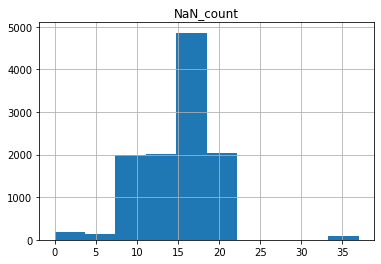

In [0]:
#isFraud = 1
i_merged[i_merged.isFraud == 1].hist('NaN_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D749558EF0>]],
      dtype=object)

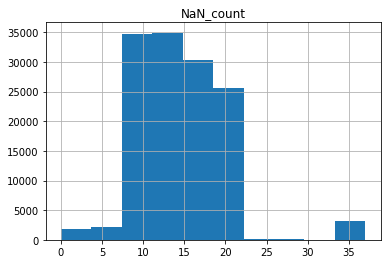

In [0]:
#isFraud = 0
i_merged[i_merged.isFraud == 0].hist('NaN_count')

In [0]:
i_merged.head()

,TransactionID,isFraud,DeviceInfo,DeviceType,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,NaN_count
0,2987004,0,SAMSUNG SM-G892A Build/NRD90M,mobile,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,17
1,2987008,0,iOS Device,mobile,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,14
2,2987010,0,Windows,desktop,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,15
3,2987011,0,NaN,desktop,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,20
4,2987016,0,MacOS,desktop,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,10


###  <font color='blue'>변수별 EDA - Continous</font> 


In [0]:
#Correlation Matrix
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = i_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

,TransactionID,isFraud,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,NaN_count
TransactionID,1,0.0929353,-0.0941453,0.170335,-0.0232686,-0.000267604,-0.0611983,-0.0269559,-0.119807,0.0367722,-0.0329541,0.00924494,0.0318314,0.0850149,0.0431514,0.222829,0.111975,-0.0150304,0.0841049,-0.0290035,0.0526215,-0.0383391,0.0206723,0.0136696,-0.0664368,0.0896217
isFraud,0.0929353,1,-0.120099,0.0493979,0.0414566,-0.0597013,-0.00797841,-0.0271394,-0.0847679,-0.0574888,0.0294309,0.0110426,0.00791442,-0.019538,0.0573237,0.1501,0.0500039,-0.0417214,0.0615965,0.0635439,0.118409,-0.00190505,0.0340447,0.099587,0.0697017,0.0120222
id_01,-0.0941453,-0.120099,1,-0.142064,0.0195112,0.0396597,0.00966578,0.201637,0.11428,0.0995868,0.0291736,0.0507367,0.0144526,0.088596,-0.0853307,-0.180504,-0.0166258,0.000518504,-0.071238,-0.167421,0.00824133,-0.132626,-0.0369538,-0.0698744,-0.00438616,-0.0708976
id_02,0.170335,0.0493979,-0.142064,1,-0.0201149,0.000605081,-0.101547,-0.0470408,-0.00075781,0.00504655,-0.0206558,0.01749,0.0537749,-0.0358135,-0.0376941,0.412987,0.142657,-0.0930678,0.108523,-0.00613471,0.190991,0.0397599,0.0237625,0.0690952,0.130711,0.373101
id_03,-0.0232686,0.0414566,0.0195112,-0.0201149,1,0.342178,0.0342799,0.0560694,0.0212344,0.0567367,0.710782,0.112707,-0.00597624,0.0139763,0.00127737,-0.000818863,0.0118563,-0.0095593,0.00334234,0.0718721,0.0686015,-0.0227825,-0.0182474,0.025608,-0.0115261,0.0138708
id_04,-0.000267604,-0.0597013,0.0396597,0.000605081,0.342178,1,-0.0292644,0.0812691,0.0430196,0.0514552,0.25147,0.337323,-0.00111892,0.010061,-0.0415169,-0.00520691,0.0173001,0.0179257,-0.00660875,0.0111532,0.000453911,-0.0731104,-0.0849645,-0.035366,0.0164673,0.0248379
id_05,-0.0611983,-0.00797841,0.00966578,-0.101547,0.0342799,-0.0292644,1,-0.291584,0.219281,0.00864465,0.0858817,-0.0709845,-0.0430374,-0.0366375,-0.00198472,-0.203021,-0.137848,-0.0238005,-0.0580697,-0.1019,-0.126581,-0.00658385,-0.0574632,-0.0336025,0.0996028,-0.2124
id_06,-0.0269559,-0.0271394,0.201637,-0.0470408,0.0560694,0.0812691,-0.291584,1,-0.0289097,0.326691,0.0799886,0.222372,0.0208413,0.0748354,-0.0296471,-0.0287075,0.0489046,0.0296467,-0.0710155,0.118837,0.131131,0.0752008,-0.0523055,0.0867236,-0.0863025,0.0980691
id_07,-0.119807,-0.0847679,0.11428,-0.00075781,0.0212344,0.0430196,0.219281,-0.0289097,1,-0.0940861,0.082746,0.0719875,0.028578,-0.0958749,-0.156789,-0.114993,-0.161544,-0.0509642,-0.0747696,-0.18825,-0.277448,-0.070752,0.0376495,-0.131638,0.227533,-0.207424
id_08,0.0367722,-0.0574888,0.0995868,0.00504655,0.0567367,0.0514552,0.00864465,0.326691,-0.0940861,1,0.112471,0.0863257,-0.0115663,0.0368573,0.00369845,0.0969856,-0.0614565,0.0527358,-0.00183679,0.0855335,0.143301,-0.0118495,-0.00362803,0.0372123,-0.0203808,0.156631


isFraud
0    -9.667667
1   -16.075632
Name: id_01, dtype: float64
isFraud
0    13.592128
1    20.397506
Name: id_01, dtype: float64
-100.0
0.0


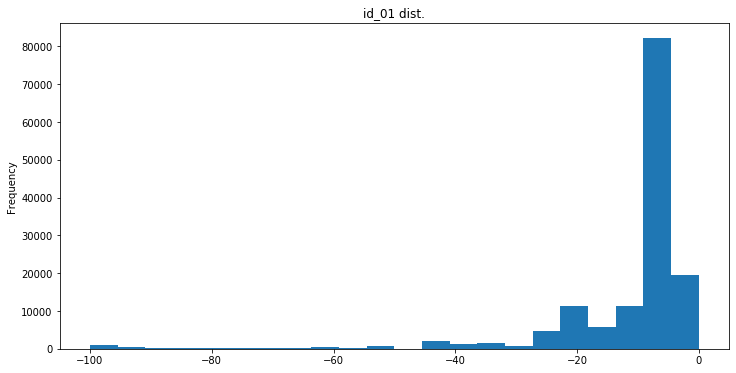

In [0]:
#id_01 : 0 이하의 값들을 가지며 skewed 형태. 필요시 log 변환을 통한 처리가 가능할 듯.
i_merged.id_01.plot(kind='hist', bins=22, figsize=(12,6), title='id_01 dist.')
print(i_merged.groupby('isFraud')['id_01'].mean(),
      i_merged.groupby('isFraud')['id_01'].std(),
     i_merged.id_01.min(),
     i_merged.id_01.max(), sep = '\n')

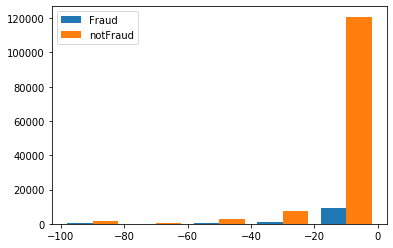

In [0]:
Fraud = (i_merged[i_merged.isFraud == 1]['id_01'])
notFraud = i_merged[i_merged.isFraud == 0]['id_01']
plt.hist([Fraud, notFraud],bins = 5, label=['Fraud', 'notFraud'])
plt.legend(loc='upper left')
plt.show()

isFraud
0    172396.362892
1    201522.569239
Name: id_02, dtype: float64
isFraud
0    158181.415938
1    173522.003842
Name: id_02, dtype: float64
1.0
999595.0


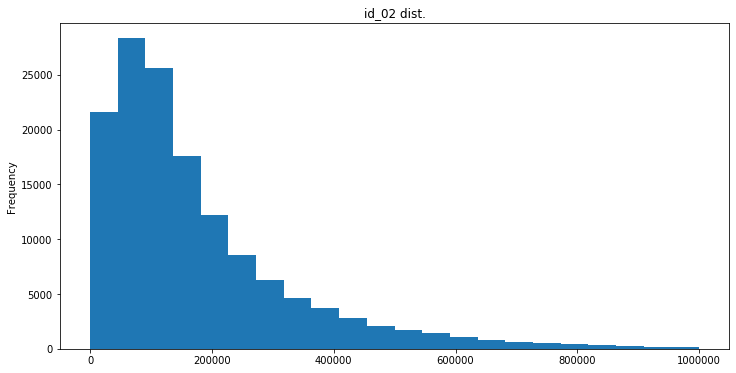

In [0]:
#id02: 최솟값 1을 가지며 skewed 형태. 마찬가지로 로그 변환 가능
i_merged.id_02.plot(kind='hist', bins=22, figsize=(12,6), title='id_02 dist.')
print(i_merged.groupby('isFraud')['id_02'].mean(),
      i_merged.groupby('isFraud')['id_02'].std(),
     i_merged.id_02.min(),
     i_merged.id_02.max(), sep = '\n')

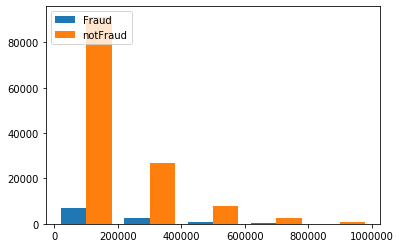

In [0]:
Fraud = (i_merged[i_merged.isFraud == 1]['id_02'])
notFraud = i_merged[i_merged.isFraud == 0]['id_02']
plt.hist([Fraud, notFraud],bins = 5, label=['Fraud', 'notFraud'])
plt.legend(loc='upper left')
plt.show()

isFraud
0    1.627956
1    1.473775
Name: id_05, dtype: float64 isFraud
0    5.245558
1    5.297058
Name: id_05, dtype: float64


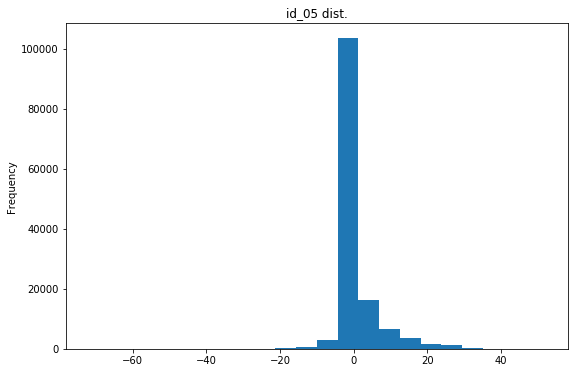

In [0]:
#id_05
i_merged.id_05.plot(kind='hist', bins=22, figsize=(9,6), title='id_05 dist.')
print(i_merged.groupby('isFraud')['id_05'].mean(),
      i_merged.groupby('isFraud')['id_05'].std())

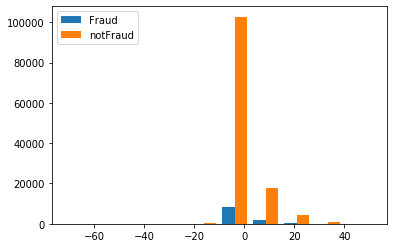

In [0]:
Fraud = (i_merged[i_merged.isFraud == 1]['id_05'])
notFraud = i_merged[i_merged.isFraud == 0]['id_05']
plt.hist([Fraud, notFraud],bins = 10, label=['Fraud', 'notFraud'])
plt.legend(loc='upper left')
plt.show()

isFraud
0   -6.566518
1   -8.213987
Name: id_06, dtype: float64 isFraud
0    16.442454
1    16.966203
Name: id_06, dtype: float64


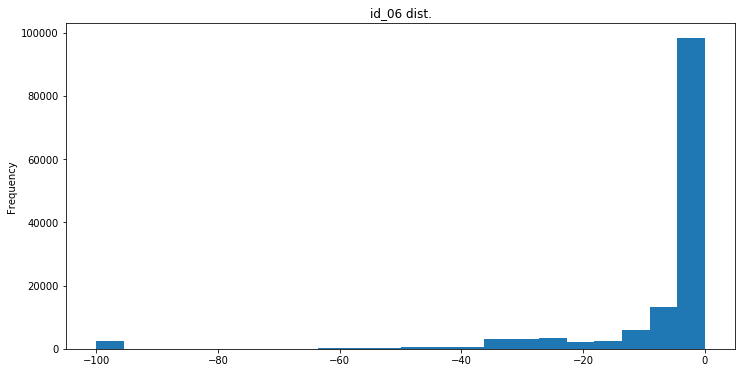

In [0]:
#id_06
i_merged.id_06.plot(kind='hist', bins=22, figsize=(12,6), title='id_06 dist.')
print(i_merged.groupby('isFraud')['id_06'].mean(),
      i_merged.groupby('isFraud')['id_06'].std())

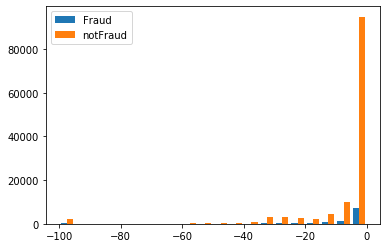

In [0]:
Fraud = (i_merged[i_merged.isFraud == 1]['id_06'])
notFraud = i_merged[i_merged.isFraud == 0]['id_06']
plt.hist([Fraud, notFraud],bins = 20, label=['Fraud', 'notFraud'])
plt.legend(loc='upper left')
plt.show()

isFraud
0    99.742701
1    99.775677
Name: id_11, dtype: float64 isFraud
0    1.137140
1    1.010306
Name: id_11, dtype: float64


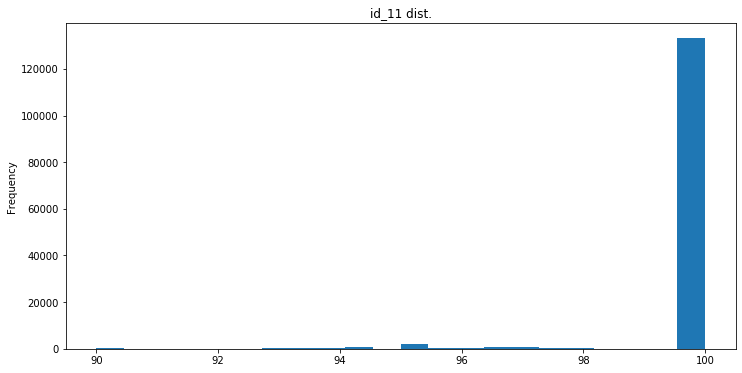

In [0]:
#id_11
i_merged.id_11.plot(kind='hist', bins=22, figsize=(12,6), title='id_11 dist.')
print(i_merged.groupby('isFraud')['id_11'].mean(),
      i_merged.groupby('isFraud')['id_11'].std())

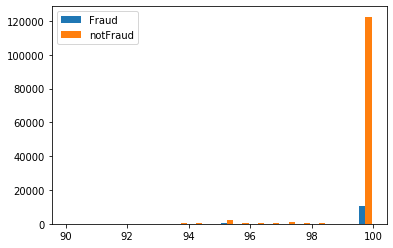

In [0]:
Fraud = (i_merged[i_merged.isFraud == 1]['id_11'])
notFraud = i_merged[i_merged.isFraud == 0]['id_11']
plt.hist([Fraud, notFraud],bins = 20, label=['Fraud', 'notFraud'])
plt.legend(loc='upper left')
plt.show()

###  <font color='blue'>변수별 EDA - Categorical</font> 


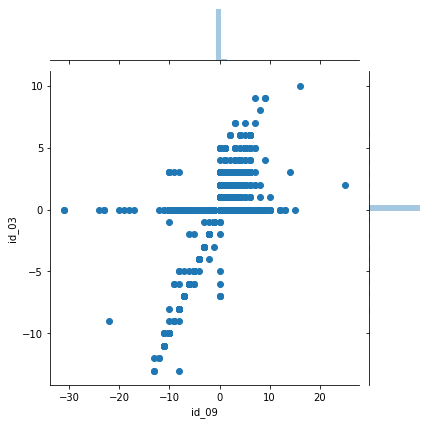

In [0]:
sns.jointplot(x = 'id_09', y = 'id_03', data = i_merged)

###  <font color='blue'>Feature Engineering</font> 

<br>
<br>
** Categorical이지만 가짓수가 많은 경우 정보가 있을 때 1, 아닐 때 0으로 처리함. BaseModel 돌리기 위해 이렇게 설정하였지만, 전처리를 바꿔가는 작업에서는 이 변수들을 다른 방식으로 처리 할 필요가 더 생길 수도 있음.
<br>
** Pair 관계가 있음. id03,04 / id05,06 / id07,08, 21~26 / id09, 10 ::함께 데이터가 존재하거나(1) NaN이거나(0). 한편 EDA-Category를 보면 id03, 09의 경우 상관관계가 있는 것으로 추정되어 추가적인 변형을 하지 않았음.
<br>
** https://www.kaggle.com/pablocanovas/exploratory-analysis-tidyverse 에서 변수별 EDA 시각화 참고하였고, nan값 제외하고는 Fraud 비율이 낮은 변수부터 1,2..차례로 할당함
<br>
<br>
<br>
### $Contionous Features$
<br>
id01:: 결측치가 없으며 로그변형을 통해 양수화 및 Scailing 시킴. 5의 배수임을 감안할 때 5로 나누는 scailing을 진행해봐도 좋을 듯.
<br>
id02:: 결측치가 존재하나, 로그 변형을 통해 정규분포에 흡사한 모양으로 만들고 매우 큰 단위를 Scailing하였음. 결측치는 Random 방식을 이용하여 채웠으나 가장 위험한 방식으로 imputation으로 한 것이므로 주의가 필요함.
<br>
<br>
<br>
### $Categorical Features$
<br>
DeviceType:: {NaN: 0, 'desktop': 1, 'mobile': 2}   
<br>
DeviceInfo:: {Nan: 0, 정보있음:1}
<br>
id12::{0:0, 'Found': 1, 'NotFound': 2}
<br>
id13::{Nan: 0, 정보있음:1}
<br>
id14::{Nan: 0, 정보있음:1}
<br>
id15::{Nan:0, 'New':1, 'Unknown':2, 'Found':3} #15, 16은 연관성이 보임 
<br>
id16::{Nan:0, 'NotFound':1, 'Found':2}
<br>
id17::{Nan: 0, 정보있음:1}
<br>
id18::{Nan: 0, 정보있음:1} #가짓수 다소 적음
<br>
id19::{Nan: 0, 정보있음:1}
<br>
id20::{Nan: 0, 정보있음:1} #id 17, 19, 20은 Pair
<br>
id21
<br>
id22
<br>
id23::{IP_PROXY:ANONYMOUS:2, else:1, nan:0} #id 7,8 21~26은 Pair. Anonymous만 유독 Fraud 비율이 높기에 고려함. 우선은 베이스 모델에서는 id_23만 사용
<br>
id24
<br>
id25
<br>
id26
<br>
id27:: {Nan:0, 'NotFound':1, 'Found':2}
<br>
id28:: {0:0, 'New':1, 'Found':2}
<br>
id29:: {0:0, 'NotFound':1, 'Found':2}
<br>
id30(OS):: {Nan: 0, 정보있음:1}, 데이터가 있다 / 없다로 처리하였지만 Safari Generic에서 사기 확률이 높다 등의 조건을 고려해야한다면 다른 방식으로 전처리 필요할 듯
<br>
id31(browser):: {Nan: 0, 정보있음:1}, id30과 같음
<br>
id32::{nan:0, 24:1, 32:2, 16:3, 0:4}
<br>
id33(해상도)::{Nan: 0, 정보있음:1} 
<br>
id34:: {nan:0, matchstatus= -1:1, matchstatus=0 :2, matchstatus=1 :3, matchstatus=2 :4} , matchstatus가 -1이면 fraud일 확률 매우 낮음
<br>
id35:: {Nan:0, 'T':1, 'F':2}
<br>
id36:: {Nan:0, 'T':1, 'F':2}
<br>
id37:: {Nan:0, 'T':2, 'F':1}
<br>
id38:: {Nan:0, 'T':1, 'F':2}
<br>


In [20]:
#Continous Features
i_merged.id_01 = np.log(-i_merged.id_01 + 1)
i_merged.id_02 = np.log(i_merged.id_02) 

In [21]:
medi = i_merged.id_02.median()

In [22]:
i_merged.id_02 = i_merged.id_02.fillna(medi)

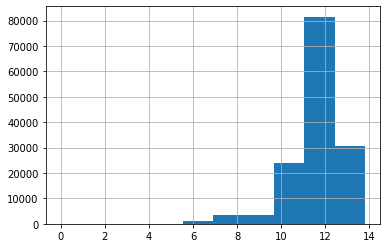

In [23]:
i_merged.id_02.hist()

In [1]:
#id_02의 NaN값을 random하게 채워줌
#i_merged['id_02_filled'] = i_merged['id_02']
#temp = (i_merged['id_02'].dropna()
#        .sample(i_merged['id_02'].isnull().sum())
#      )
#temp.index = i_merged[lambda x: x.id_02.isnull()].index
#i_merged.loc[i_merged['id_02'].isnull(), 'id_02_filled'] = temp

In [0]:
#Categorical Features

i_merged.DeviceType = i_merged.DeviceType.fillna(0).map({0:0, 'desktop': 1, 'mobile': 2})
i_merged.DeviceInfo = i_merged.DeviceInfo.notnull().astype(int)
i_merged.id_12 = i_merged.id_12.fillna(0).map({0:0, 'Found': 1, 'NotFound': 2})
i_merged.id_13 = i_merged.id_13.notnull().astype(int)
i_merged.id_14 = i_merged.id_14.notnull().astype(int)
i_merged.id_14 = i_merged.id_14.notnull().astype(int)
i_merged.id_15 = i_merged.id_15.fillna(0).map({0:0, 'New':1, 'Unknown':2, 'Found':3})
i_merged.id_16 = i_merged.id_16.fillna(0).map({0:0, 'NotFound':1, 'Found':2})
i_merged.id_17 = i_merged.id_17.notnull().astype(int)
i_merged.id_18 = i_merged.id_18.notnull().astype(int) 
i_merged.id_19 = i_merged.id_19.notnull().astype(int)
i_merged.id_20 = i_merged.id_20.notnull().astype(int)
i_merged.id_23 = i_merged.id_23.fillna('temp').map({'temp':0, 'IP_PROXY:ANONYMOUS':2}).fillna(1)
i_merged.id_27 = i_merged.id_27.fillna(0).map({0:0, 'NotFound':1, 'Found':2})
i_merged.id_28 = i_merged.id_28.fillna(0).map({0:0, 'New':1, 'Found':2})
i_merged.id_29 = i_merged.id_29.fillna(0).map({0:0, 'NotFound':1, 'Found':2})
i_merged.id_30 = i_merged.id_30.notnull().astype(int)
i_merged.id_31 = i_merged.id_31.notnull().astype(int)
i_merged.id_32 = i_merged.id_32.fillna('temp').map({'temp':0, 24:1, 32:2, 16:3, 0:4})
i_merged.id_33 = i_merged.id_33.notnull().astype(int)
i_merged.id_34 = i_merged.id_34.fillna('temp').map({'temp':0, 'match_status:-1':1, 'match_status:0':3, 'match_status:1':4, 'match_status:2':2})
i_merged.id_35 = i_merged.id_35.fillna(0).map({0:0, 'T':1, 'F':2})
i_merged.id_36 = i_merged.id_38.fillna(0).map({0:0, 'T':1, 'F':2})
i_merged.id_37 = i_merged.id_38.fillna(0).map({0:0, 'T':2, 'F':1})
i_merged.id_38 = i_merged.id_38.fillna(0).map({0:0, 'T':1, 'F':2})

Identity_Device FE

In [ ]:
i_merged['Device_info_clean'] = i_merged['DeviceInfo']
i_merged['Device_info_clean'] = i_merged['Device_info_clean'].fillna('unknown')

In [ ]:
def name_divide(name):
  if name == 'Windows':
    return 'Windows'
  elif name == 'iOS Device':
    return 'iOS Device'
  elif name == 'MacOS':
    return 'MacOS'
  elif name == 'Trident/7.0':
    return 'Trident/rv'
  elif "rv" in name:
    return 'Trident/rv'
  elif "SM" in name:
    return 'SM/moto/lg'
  elif name == 'SAMSUNG':
    return 'SM'
  elif 'LG' in name:
    return 'SM/Moto/LG'
  elif 'Moto' in name:
    return 'SM/Moto/LG'
  elif name == 'unknown':
    return 'unknown'
  else:
    return 'others'

In [ ]:
i_merged['Device_info_clean'] = i_merged['Device_info_clean'].apply(name_divide)
i_merged['Device_info_clean'].value_counts()

###  <font color='blue'>Identity_feature engineered_dataset</font>

In [0]:
i_merged.columns

Index(['TransactionID', 'isFraud', 'DeviceInfo', 'DeviceType', 'id_01',
       'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17',
       'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'NaN_count',
       'id_02_filled'],
      dtype='object')

In [33]:
selected = []
selected.extend(['TransactionID', 'isFraud', 'id_01', 'id_02', 'DeviceType','Device_info_clean'])

In [34]:
id_exist = i_merged[selected].assign(Exist = 1)

In [36]:
id_exist.DeviceType.fillna('unknown', inplace = True)

In [38]:
id_exist.to_csv('identity_first.csv',index = False)

###  <font color='blue'>Test: Decision Tree / Random Forest Test</font> 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [0]:
X = id_exist.drop(['isFraud'], axis = 1)
Y = id_exist['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
pred = tree_clf.predict(X_test)
print('F1:{}'.format(f1_score(y_test, pred)))

F1:0.22078820004609356


--------------------------

In [0]:
param_grid = {
    'max_depth': list(range(10,51,10)),
    'n_estimators': [20, 20, 20]
}

rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gs.fit(X_train,y_train)
best_rf = gs.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.4min finished


In [0]:
print('best parameter: \n',gs.best_params_)

best parameter: 
 {'max_depth': 20, 'n_estimators': 20}


In [0]:
y_pred = best_rf.predict(X_test)

In [0]:
print('Accuracy:{}'.format(accuracy_score(y_test, y_pred)),
      'Precision:{}'.format(precision_score(y_test, y_pred)),
      'Recall:{}'.format(recall_score(y_test, y_pred)),
      'F1:{}'.format(f1_score(y_test, y_pred)),
     'ROC_AUC:{}'.format(roc_auc_score(y_test, y_pred)), sep = '\n')

Accuracy:0.9298821354287035
Precision:0.6993006993006993
Recall:0.20390329158170697
F1:0.31574199368516015
ROC_AUC:0.5981737508690471


-----------------------

###  <font color='blue'>거래 + ID merge</font> 

In [100]:
transaction_c = pd.read_csv('train_combined.csv')
id_c = pd.read_csv('identity_first.csv')

In [101]:
region = pd.read_csv('region.csv')
country = region[['TransactionID', 'Country_code']]
country.head()

,TransactionID,Country_code
0,2987000,0
1,2987001,1
2,2987002,1
3,2987003,1
4,2987004,1


In [102]:
f_draft = transaction_c.merge(id_c.drop(['isFraud'], axis = 1) ,how = 'left', on = 'TransactionID')

In [103]:
f_draft.drop('DeviceInfo', axis = 1, inplace = True)

In [104]:
f_draft = f_draft.merge(country, how = 'left', on = 'TransactionID')
f_draft.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,C1,D1,D10,D15,V12,V53,V75,V95,V279,V281,exist,dt_month,dt_hour,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,id_01,id_02,DeviceType,Device_info_clean,Exist,Country_code
0,2987000,0,86400,68.5,W,13926,321.0,150.0,discover,142.0,credit,87.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,2.0,112.0,84.0,111.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.0,11.167431,mobile,SM/moto/lg,1.0,1


In [105]:
f_draft.dtypes

TransactionID               int64
isFraud                     int64
TransactionDT               int64
TransactionAmt            float64
ProductCD                  object
card1                       int64
card2                     float64
card3                     float64
card4                      object
card5                     float64
card6                      object
addr2                     float64
C1                        float64
D1                        float64
D10                       float64
D15                       float64
V12                       float64
V53                       float64
V75                       float64
V95                       float64
V279                      float64
V281                      float64
exist                       int64
dt_month                    int64
dt_hour                     int64
ProductCD_C                 int64
ProductCD_H                 int64
ProductCD_R                 int64
ProductCD_S                 int64
ProductCD_W   

Categorical: 'ProductCD', 'card4', 'card6', 'D15', 'DeviceType', 'Device_info_clean'

In [106]:
print(
f_draft.ProductCD.unique(),
f_draft.card4.unique(),
f_draft.card6.unique(),
f_draft.D15.unique(),
f_draft.DeviceType.unique(),
f_draft.Device_info_clean.unique(),
)

['W' 'H' 'C' 'S' 'R'] ['discover' 'mastercard' 'visa' 'american express'] ['credit' 'debit' 'debit or credit' 'charge card'] [  0. 315. 111. 318. 107.  45.  62. 109.  65.  26. 244. 391. 259. 121.
 245. 290. 477. 541. 389.  22. 289.   2. 406. 458.  20.   5.  35.  12.
 104. 248. 237. 466. 284.  46. 455. 456. 218.  77. 450. 403. 444.  71.
   9.  39. 428. 327.  40. 249. 143. 292. 416.  36. 362. 454.  72. 479.
 120. 426. 247. 453. 457. 124. 335.   7. 145.  14. 100. 413. 232. 268.
  63.  37. 591.  30. 363. 190. 374.  76. 151. 152.  10.  32.  82.  17.
 299. 163. 233.  66.  81.  55. 102. 211. 462. 242. 485. 142. 338. 321.
 125. 127. 302.  48.  93. 137. 304. 421. 330. 471. 212.   6.  27. 264.
 117. 461. 439.  90.  15. 173. 126. 401. 449. 347.  11. 440. 451.  97.
 420.  49. 101. 280. 481. 332. 385.  79. 149. 470. 380. 164.   1. 204.
 483. 319.   8. 394. 309.  43. 480.  92.  58. 438. 448.  69. 350.  42.
 367.  67. 566. 314. 105.  99. 467. 371.  28. 351.  56.  89. 459.  74.
 230. 274.  91. 256. 25

In [70]:
print(map_ProductCD, map_card4,map_card6,map_D15, sep = '\n')

{'W': 0, 'H': 1, 'C': 2, 'S': 3, 'R': 4}
{'discover': 0, 'mastercard': 1, 'visa': 2, 'american express': 3}
{'credit': 0, 'debit': 1, 'debit or credit': 2, 'charge card': 3}
{'credit': 0, 'debit': 1, 'debit or credit': 2, 'charge card': 3}


map_ProductCD = {'W': 0, 'H': 1, 'C': 2, 'S': 3, 'R': 4}
<br>
map_card4 = {'discover': 0, 'mastercard': 1, 'visa': 2, '}american express': 3}
<br>
map_card6 = {'credit': 0, 'debit': 1, 'debit or credit': 2, 'charge card': 3}
<br>
map_D15 = {'credit': 0, 'debit': 1, 'debit or credit': 2, 'charge card': 3}
<br>
map_DeviceType = {'mobile':2 'desktop':1 'unknown':0}
<br>
map_Device_info_clean = {'SM/moto/lg':1, 'iOS Device':2, 'Windows':3, 'unknown':0, 'MacOS':4, 'others':5,
 'Trident/rv':6}

In [74]:
f_draft.ProductCD = f_draft.ProductCD.map(map_ProductCD)
f_draft.card4 = f_draft.card4.map(map_card4)
f_draft.card6 = f_draft.card6.map(map_card6)
f_draft.D15 = f_draft.D15.map(map_D15)
f_draft.DeviceType = f_draft.DeviceType.map(map_DeviceType)
f_draft.Device_info_clean = f_draft.Device_info_clean.map(map_Device_info_clean)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,C1,D1,D10,D15,V12,V53,V75,V95,V279,V281,exist,dt_month,dt_hour,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,id_01,id_02,DeviceType,Device_info_clean,Country_code
0,2987000,0,86400,68.5,0,13926,321.0,150.0,0,142.0,0,87.0,1.0,14.0,13.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN,0
1,2987001,0,86401,29.0,0,2755,404.0,150.0,1,102.0,0,87.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.0,0,4663,490.0,150.0,2,166.0,1,87.0,1.0,0.0,0.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,NaN,NaN,NaN,NaN,1
3,2987003,0,86499,50.0,0,18132,567.0,150.0,1,117.0,1,87.0,2.0,112.0,84.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,1
4,2987004,0,86506,50.0,1,4497,514.0,150.0,1,102.0,0,87.0,1.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.0,11.167431,2.0,1.0,1


In [107]:
f_draft.to_csv('transaction_id_combined(no_label_encoded).csv', index = False)

In [78]:
f_draft.ProductCD = f_draft.ProductCD.astype('category')
f_draft.card4 = f_draft.card4.astype('category')
f_draft.card6 = f_draft.card6.astype('category')
f_draft.card1 = f_draft.card1.astype('category')
f_draft.card2 = f_draft.card2.astype('category')
f_draft.card3 = f_draft.card3.astype('category')
f_draft.card5 = f_draft.card5.astype('category')
f_draft.D15 = f_draft.D15.astype('category')
f_draft.DeviceType = f_draft.DeviceType.astype('category')
f_draft.Device_info_clean = f_draft.Device_info_clean.astype('category')
f_draft.Country_code = f_draft.Country_code.astype('category')

In [82]:
f_draft.card1 = f_draft.card1.astype('category')
f_draft.card2 = f_draft.card2.astype('category')
f_draft.card3 = f_draft.card3.astype('category')
f_draft.card5 = f_draft.card5.astype('category')

In [83]:
f_draft.dtypes

TransactionID                int64
isFraud                      int64
TransactionDT                int64
TransactionAmt             float64
ProductCD                 category
card1                     category
card2                     category
card3                     category
card4                     category
card5                     category
card6                     category
addr2                      float64
C1                         float64
D1                         float64
D10                        float64
D15                       category
V12                        float64
V53                        float64
V75                        float64
V95                        float64
V279                       float64
V281                       float64
exist                        int64
dt_month                     int64
dt_hour                      int64
ProductCD_C                  int64
ProductCD_H                  int64
ProductCD_R                  int64
ProductCD_S         

In [98]:
f_draft.to_csv('transaction_id_combined.csv', index = False)

In [99]:
f_draft.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,C1,D1,D10,D15,V12,V53,V75,V95,V279,V281,exist,dt_month,dt_hour,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,id_01,id_02,DeviceType,Device_info_clean,Country_code
0,2987000,0,86400,68.5,0,13926,321.0,150.0,0,142.0,0,87.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN,0
1,2987001,0,86401,29.0,0,2755,404.0,150.0,1,102.0,0,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.0,0,4663,490.0,150.0,2,166.0,1,87.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,NaN,NaN,NaN,NaN,1
3,2987003,0,86499,50.0,0,18132,567.0,150.0,1,117.0,1,87.0,2.0,112.0,84.0,111.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,1
4,2987004,0,86506,50.0,1,4497,514.0,150.0,1,102.0,0,87.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.0,11.167431,2.0,1.0,1
